# Sistem de recomandare muzica

In [51]:
%matplotlib inline

import pandas
from sklearn.model_selection import train_test_split
import numpy as np
import time
import sklearn.externals
import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

# Incarcam datele

In [52]:
#Download set date
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

#Citim tripletul folosind pandas si definim coloanele ca fiind: user_id, song_id si listen_count
song_df_1 = pandas.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

#Tot cu pandas citim metadatele pentru sistemul nostru
song_df_2 =  pandas.read_csv(songs_metadata_file)

#Combinam fisierul metadata cu fisierul triplet
#Cand combinam doua sau mai multe dataset-uri o sa existe duplicate, asa ca eliminam duplicatele folosind song_id
song_df = pandas.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left") 

# Vizualizare date

Folosind comanda song_df.head() ne permite sa vizualizam setul de date combinat

In [53]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


## Lungimea setului nostru de date

In [54]:
len(song_df)

2000000

## Cream un set mai mic de date

In [55]:
song_df = song_df.head(10000)

#Combinam coloana artist cu titlu melodiei
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

## Afisam cele mai ascultate melodii din setul nostru de date

In [56]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()


song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])


,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


## Calculam numarul de useri unici si numarul de melodii unice

In [57]:
users = song_df['user_id'].unique()
len(users)


365

In [58]:
songs = song_df['song'].unique()

len(songs)

5151

# Implementarea sistemului de recomandare muzica

In [59]:
#Cream sistem de recomadare muzica, prin impartirea setului nostru de date in set de date de antrenare si testare.
#Folosim train_test_split din biblioteca scikit-learn si alegem arbitrar 20% pentru dimensiunea de testare 
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

## Avem implementata o clasa care recomanda muzica in functie de popularitate

In [60]:
#Se creeaza o instanta a acelei clase
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

### Bazandu-ne pe popularitatea fiecarei melodii, creeam o recomandare pentru un anumit user

In [61]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,37,1.0
4083,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,27,2.0
931,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,24,4.0
3034,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,21,5.0
3189,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Secrets - OneRepublic,21,6.0
4112,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,21,7.0
1207,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,20,8.0
1577,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,19,9.0
1626,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


### Folosim modelul de mai sus pentru a genera predictii pentru diferiti utilizatori

In [62]:

user_id = users[7]
pm.recommend(user_id)


,user_id,song,score,Rank
3194,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Sehr kosmisch - Harmonia,37,1.0
4083,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Undo - Björk,27,2.0
931,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,You're The One - Dwight Yoakam,24,4.0
3034,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Revelry - Kings Of Leon,21,5.0
3189,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Secrets - OneRepublic,21,6.0
4112,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Use Somebody - Kings Of Leon,21,7.0
1207,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Fireflies - Charttraxx Karaoke,20,8.0
1577,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Hey_ Soul Sister - Train,19,9.0
1626,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


## Implementam un sistem de recomandare de muzica personalizat

Cream un sistem bazat pe filtrarea cobalorativa pentru a oferi recomandari personalizate fiecarui utilizator

### Se instantiaza clasa

In [63]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

### Folosim modelul personalizat pentru a genera recomandari de muzica

In [65]:
#Afisam melodiile pentru fiecare utilizator in etapa de antrenare
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Melodii recomandate folosind modelul personalizat
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 4bd88bfb25263a75bbdd467e74018f4ae570e5df:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman - Eminem / Dina Rae,0.088692,1
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird - Eminem,0.067663,2
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back - Eminem,0.065385,3
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile - Justin Bieber,0.064525,4
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You - 3 Doors Down,0.062293,5
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound - J-Black & Masta Ace,0.055769,6
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling - Iration,0.052564,9
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


### Folosim modelul de mai sus pentru a genera predictii pentru diferiti utilizatori

In [66]:
user_id = users[7]

user_items = is_model.get_user_items(user_id)
#Afisam melodiile pentru fiecare utilizator in etapa de antrenare
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Melodii recomandate folosind modelul personalizat
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data songs for the user userid: 9d6f0ead607ac2a6c2460e4d14fb439a146b7dec:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight - Four Tet,0.281579,1
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign - Coldplay,0.281579,2
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change - Coldplay,0.281579,3
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad - Puppetmastaz,0.281579,4
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q - Creedence Clearwater Revival,0.281579,6
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker - Fatboy Slim,0.281579,7
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds - Four Tet,0.281579,9
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives - Four Tet,0.281579,10


### Putem aplica modelul pentru a gasi melodii similare in setul nostru de date

In [67]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :271


,user_id,song,score,rank
0,,Somebody To Love - Justin Bieber,0.428571,1
1,,Bad Company - Five Finger Death Punch,0.375000,2
2,,Love Me - Justin Bieber,0.333333,3
3,,One Time - Justin Bieber,0.333333,4
4,,Here Without You - 3 Doors Down,0.333333,5
5,,Stuck In The Moment - Justin Bieber,0.333333,6
6,,Teach Me How To Dougie - California Swag District,0.333333,7
7,,Paper Planes - M.I.A.,0.333333,8
8,,Already Gone - Kelly Clarkson,0.333333,9
9,,The Funeral (Album Version) - Band Of Horses,0.300000,10


### Folosim sistemul pentru o alta melodie

In [68]:
song = 'Yellow - Coldplay'
is_model.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :969


,user_id,song,score,rank
0,,Fix You - Coldplay,0.375000,1
1,,Creep (Explicit) - Radiohead,0.291667,2
2,,Clocks - Coldplay,0.280000,3
3,,Seven Nation Army - The White Stripes,0.250000,4
4,,Paper Planes - M.I.A.,0.208333,5
5,,Halo - Beyoncé,0.200000,6
6,,The Funeral (Album Version) - Band Of Horses,0.181818,7
7,,In My Place - Coldplay,0.181818,8
8,,Kryptonite - 3 Doors Down,0.166667,9
9,,When You Were Young - The Killers,0.166667,10


# Comparari intre cele doua modele

Pentru a masura performantele celor doua modele, folosim trei metrici: precision, recall, F-1 Score

In [69]:
start = time.time()

#Definim procentul de useri pe care il folosim in calculul performantei
user_sample = 0.05

#Cream o instanta a clasei de calculare a preciziei
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:cf0f642e9e796ba3c47118687782426c5427efb5
No. of unique songs for the user: 3
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :34
Getting recommendations for user:6251be155cbf0728f2528bb02951e0bc6c11acb2
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1178
Getting recommendations for user:4d4abafb7dd7a30206747398c9225f3e06942b3f
No. of unique songs for the user: 21
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :4777
Getting recommendations for user:8ee90038724c4957eb4df16f3e9c6ed2b570a3ec
No. of unique songs for the user: 20
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :752
Getting recommendations for user:ebb3d26d2662c42f6304f883c150ebdb2fb05042
No. of unique songs for the user: 7
no. of unique songs in the tr

## Plotam graficul precision-recall 

In [70]:
import pylab as pl

#Metoda pentru a genera graficul de precision-recall
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Graficul Precision-Recall')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Se ploteaza graficul


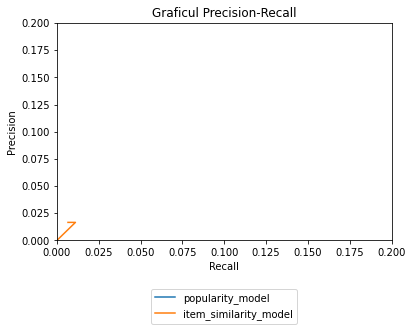

In [71]:
print("Se ploteaza graficul")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")


# Algoritmul SVD

### Importam bibliotecile necesare

In [100]:
import math as mt
import csv
from sparsesvd import sparsesvd #used for matrix factorization
import numpy as np
from scipy.sparse import csc_matrix #used for sparse matrix
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import coo_matrix

### Methods to compute SVD and recommendations

In [95]:
small_set = song_df

#Convert user and song IDs to integer values that can be handled by numpy matices
user_codes = small_set.user_id.drop_duplicates().reset_index()
song_codes = small_set.song_id.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
song_codes.rename(columns={'index':'song_index'}, inplace=True)
song_codes['so_index_value'] = list(song_codes.index)
user_codes['us_index_value'] = list(user_codes.index)
small_set = pandas.merge(small_set,song_codes,how='left')
small_set = pandas.merge(small_set,user_codes,how='left')
mat_candidate = small_set[['us_index_value','so_index_value','listen_count']]
data_array = mat_candidate.listen_count.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.so_index_value.values

data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)
data_sparse

<365x5175 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in COOrdinate format>

In [101]:
#constants defining the dimensions of our User Rating Matrix (URM)
MAX_PID = data_sparse.shape[1]
MAX_UID = data_sparse.shape[0]

#Compute SVD of the user ratings matrix
def computeSVD(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

#Compute estimated rating for the test user
def computeEstimatedRatings(urm, U, S, Vt, uTest, K, MAX_PID, MAX_UID,test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings



### Predictii pentru diferiti useri

In [105]:
#Used in SVD calculation (number of latent factors)
K=50

#Initialize a sample user rating matrix
urm = data_sparse

#Compute SVD of the input user ratings matrix
U, S, Vt = computeSVD(urm, K)

uTest = [4, 7, 11]

#Get estimated rating for test user
uTest_recommended_items = computeEstimatedRatings(urm, U, S, Vt, uTest, K, MAX_PID, MAX_UID, True)

for  user  in  uTest:
    print("\n-------------------------------------- \
    \nRecommendation for user with id: {}\n--------------------------------------\n". format(user))
    rank_value = 1
    for i in uTest_recommended_items[user,0:10]:
        song_details = small_set[small_set.so_index_value == i].drop_duplicates('so_index_value')[['title','artist_name']]
        print("#{}: {} By {}".format(rank_value, list(song_details['title'])[0],list(song_details['artist_name'])[0]))
        rank_value+=1


--------------------------------------     
Recommendation for user with id: 4
--------------------------------------

#1: With Arms Outstretched (Album Version) By Rilo Kiley
#2: You Get What You Give By New Radicals
#3: That's Just The Way We Roll By Jonas Brothers
#4: Over And Out By Foo Fighters
#5: Charade By Skids
#6: Boy With The Coin By Iron And Wine
#7: None Shall Pass (Main) By Aesop Rock
#8: This Old House w/ When The Saints Medley By George Younce
#9: Almost Lover (Album Version) By A Fine Frenzy
#10: Whatsername [feat. Green Day & The Cast Of American Idiot] (Album Version) By Green Day

--------------------------------------     
Recommendation for user with id: 7
--------------------------------------

#1: The Invisible Man By Michael Cretu
#2: The Scientist By Coldplay
#3: Clocks By Coldplay
#4: Secrets By OneRepublic
#5: O Hosanna By Pedestrian
#6: Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) By Barry Tuckwell/Academy of St Martin-in-the-Fields/

In [108]:
%matplotlib inline
from pylab import *

#Plot all the users
print("Matrix Dimensions for U")
print(U.shape)


Matrix Dimensions for U
(365, 50)
